In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Reduce_the_data_trend_windspeed_counts').getOrCreate()

df = spark.read.csv('../Bike-Sharing-Dataset-hour_new.csv',header=True,inferSchema=True)

In [12]:
import pandas as pd
from pyspark.sql.functions import *

group_df = df.select('windspeed','casual','registered','cnt')
group_df = group_df.groupBy('windspeed').mean()
group_df = group_df.select('windspeed',
                            format_number('avg(casual)',2),
                            format_number('avg(registered)',2),
                            format_number('avg(cnt)',2))
group_df = group_df.select(col('windspeed').alias('Windspeed'),
                           col('format_number(avg(casual), 2)').alias('Average Casual'),
                           col('format_number(avg(registered), 2)').alias('Average Registered'),
                           col('format_number(avg(cnt), 2)').alias('Average CNT')).orderBy('avg(cnt)')
pd.DataFrame(group_df.take(group_df.count()), columns=group_df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Windspeed,0.7761,0.8358,0.806,0.6866,0.7164,0.6418,0.0896,0,0.6119,0.5522,...,0.5224,0.4478,0.3582,0.2239,0.2537,0.4179,0.2985,0.2836,0.3881,0.8507
Average Casual,0.00,2.00,3.00,22.80,47.00,26.14,25.99,29.05,25.57,25.49,...,38.69,38.14,38.93,41.29,43.32,44.26,45.60,44.86,43.12,127.50
Average Registered,5.00,14.00,100.50,95.00,93.50,119.21,124.05,131.59,135.09,135.59,...,163.13,169.87,171.10,170.65,170.49,169.85,169.47,170.68,179.66,142.00
Average CNT,5.00,16.00,103.50,117.80,140.50,145.36,150.04,160.64,160.65,161.08,...,201.82,208.01,210.03,211.95,213.81,214.11,215.07,215.54,222.78,269.50


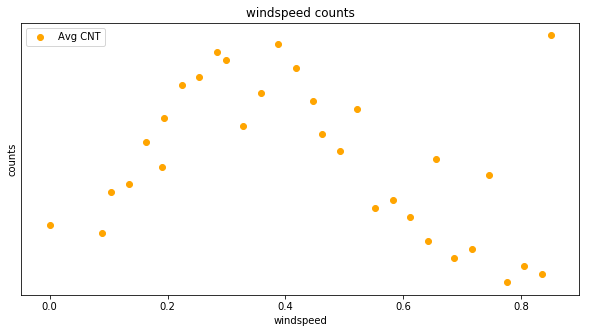

In [13]:
import matplotlib.pyplot as plt
import numpy as np

group_df = group_df.toPandas()

plt.scatter(group_df['Windspeed'], group_df['Average CNT'], color='orange')
#plt.scatter(group_df['Windspeed'], group_df['Average Registered'], color='g')
#plt.scatter(group_df['Windspeed'], group_df['Average Casual'], color='b')

plt.yticks([]) #disable yticks
plt.legend(['Avg CNT'])
plt.xlabel('windspeed')
plt.ylabel('counts')
plt.title('windspeed counts')
plt.show()

In [5]:
plt.rcParams['figure.figsize'] = (10,5)